2. RBF network for 2D function approximation based on data
You will use an RBF network to learn a regression function based on the provided synthetic dataset. You may use any sklearn, numpy, and scipy functions.
The data has 2 features, and feature space extends over 0 ≤ 𝑥# ≤ 2, 0 ≤ 𝑥$ ≤ 2.
Use Gaussian RBF basis functions: φ m (x) = exp −γ x −μm
2 { }, γ > 0, m = 1,2,!,M and use as our main error measure the root-mean-squared error: RMSE = (MSE)#/$ so that it can be numerically compared with the predicted and given outputs.

In [ ]:
# Importing the necessary libraries:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.cluster import KMeans

The dataset: (1) is in HW7_Pr2_datasetA.zip and is divided into training and testing sets, having 𝑁() = 4000, 𝑁(*+, = 2000, and number of features D=2;
(2) can be loaded by:
X_train = np.load('datasetA_X_train.npy')
X_test = np.load('datasetA_X_test.npy')
y_train = np.load('datasetA_y_train.npy')
y_test = np.load('datasetA_y_test.npy')

In [ ]:
# Loading the datasets:
X_train = np.load('datasetA_X_train.npy')
X_test = np.load('datasetA_X_test.npy')
y_train = np.load('datasetA_y_train.npy')
y_test = np.load('datasetA_y_test.npy')

(b) For comparison to the below systems, compute the RMSE of a trivial system that always outputs the sample mean value on the training-set data.
In each of parts (c)-(e) below, you will try a different method for choosing RBF centers; each part can be done independently of the other two. For each part, do the following (i)-(vi).
(i) Use MSE linear regression for the second layer, without regularization.
(ii) Use model selection for finding a good value for and any other hyperparameter that is being optimzed (such as 𝑀 in part (d), or K in part (e)). Use 4-fold cross validation based on the given training set.
Tip: for γ, choose values that range from 0.01γ- to 1000γ- , on a log scale (e.g., values γ = 0.01, 0.1, 1, 10, 100, 1000).
(iii) Report on the cross validation RMSE for each value (c) or pair of values ((d) or (e)) tried, in 2 tables: one table for RMSE (mean over the 4 folds) and one table for RMSE (standard deviation over the 4 folds). Report the best mean value (or pair of values) found.
(iv) Plot training and validation RMSE vs. γ. (For parts (d) and (e), use your best value of M = M ∗ or K = 𝐾 ∗ for the plot.) (1 plot for each of (c), (d), (e).)
(v) For parts (d) and (e), answer the following. If computational complexity were an issue, what is the smallest value of M or K (and its associated γ ) that would give RMSE at least a factor of 10 lower than the trivial system of (b)? Call this model your reduced-computational-complexity (RCC) model. What factor reduction in number of hidden units (dimensionality of the expanded feature space) from the original M=3000 in part (c) does this RCC model represent?
(vi) For parts (d) and (e), plot in original 2D feature space, the training data points 𝑥& and the cluster centers μ' for your best values of hyperparameters. Then repeat the plots for your RCC model, and again for your lowest-complexity-model (M=30 or K=30). (Total of 3 plots for (d), and 3 plots for (e).)
Tip: use small enough dots for your data-point symbols so that it is easy to visualize the data points.
(vii) Also for parts (d) and (e), plot the validation error and its standard deviation vs. the second hyperparameter (𝑀 for (d), K for (e)), using the best γ for each value of 𝑀 or K. (The value of best 𝛾 may depend on 𝑀 or K.)

In [ ]:
# Trivial model:
y_trivial = [y_train.mean()] * len(y_train) # Scaling the labels.
rmse = (mse(y_train, y_trivial)) ** 0.5
print("RMSE of the trivial system: ", rmse)

RMSE of the trivial system:  3.2035150890062902


(c) Choose the basis function centers as the data points: μm = xm, m = 1,2,!,N, in which N is the number of training data points during each fold in cross validation. For this part, the only hyperparameter to choose during model selection is γ.


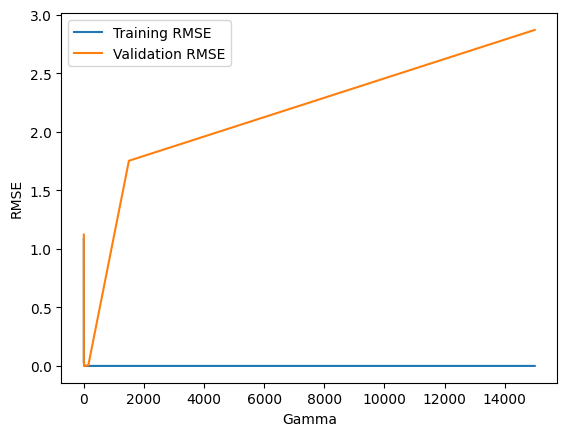

In [ ]:
gamma_d = 3000 / 200 # M / 200.
gamma = [0.01 * gamma_d, 0.1 * gamma_d, gamma_d, 10 * gamma_d, 100 * gamma_d, 1000 * gamma_d]
training_meangamma = [] 
validation_meangamma = []
training_stdgamma = [] 
validation_stdgamma = [] 
kfold = KFold(n_splits = 4)

for g in gamma:
    curr_mean_train = [] 
    curr_mean_val = []

    for i, j in kfold.split(X_train):
        train_X, val_X = X_train[i], X_train[j]
        train_y, val_y = y_train[i], y_train[j]
        layer1 = rbf_kernel(train_X, gamma = g)
        layer2 = LinearRegression().fit(layer1, train_y)
        predict_train = layer2.predict(layer1)
        layer1 = rbf_kernel(val_X, Y = train_X, gamma = g)
        predict_val = layer2.predict(layer1)
        rmse_train = mse(train_y, predict_train) ** 0.5
        rmse_val = mse(val_y, predict_val) ** 0.5 
        curr_mean_train.append(rmse_train)
        curr_mean_val.append(rmse_val)
    
    training_meangamma.append(np.array(curr_mean_train).mean())
    validation_meangamma.append(np.array(curr_mean_val).mean())
    training_stdgamma.append(np.array(curr_mean_train).std())
    validation_stdgamma.append(np.array(curr_mean_val).std())
    
plt.plot(gamma, training_meangamma, label = 'Training RMSE')
plt.plot(gamma, validation_meangamma, label = 'Validation RMSE')
plt.xlabel('Gamma')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [ ]:
best_gamma = gamma[np.argmin(np.array(validation_meangamma))]
print('Best Gamma:', best_gamma)

Best Gamma: 15.0


(d) Randomly choose the basis function centers, without replacement, from the training-set data. Use number of basis function centers M varying from 30 to 300 (e.g., values 30, 60, 100, 300, 600). In this part you have 2 hyperparameters to find during model selection (γ and M ).

In [ ]:
M = [30, 60, 100, 300, 600]
M_train = []
M_val = []
M_train_std = []
M_val_std = []

for m in M:
    gamma_d = m / 200
    gamma = [0.01 * gamma_d, 0.1 * gamma_d, gamma_d, 10 * gamma_d, 100 * gamma_d, 1000 * gamma_d]
    training_meangamma, validation_meangamma = [], []
    training_stdgamma, validation_stdgamma = [], []
    kfold = KFold(n_splits = 4)
    
    for g in gamma:
        curr_mean_train, curr_mean_val = [], []
        
        for i, j in kfold.split(X_train):
            random_idx = np.random.choice(i, m, replace = False)
            
            train_X, val_X = X_train[i], X_train[j]
            train_y, val_y = y_train[i], y_train[j]
            rand_train_X = X_train[random_idx]

            layer1 = rbf_kernel(train_X, Y = rand_train_X, gamma = g)
            layer2 = LinearRegression().fit(layer1, train_y)
            predict_train = layer2.predict(layer1)
            layer1 = rbf_kernel(val_X, Y = rand_train_X, gamma = g)
            predict_val = layer2.predict(layer1)
            rmse_train = mse(train_y, predict_train) ** 0.5
            rmse_val = mse(val_y, predict_val) ** 0.5 
            curr_mean_train.append(rmse_train)
            curr_mean_val.append(rmse_val)

        training_meangamma.append(np.array(curr_mean_train).mean())
        validation_meangamma.append(np.array(curr_mean_val).mean())
        training_stdgamma.append(np.array(curr_mean_train).std())
        validation_stdgamma.append(np.array(curr_mean_val).std())

    M_train.append(training_meangamma)
    M_val.append(validation_meangamma)
    M_train_std.append(training_stdgamma)
    M_val_std.append(validation_stdgamma)
    
row_average = [sum(i) / len(i) for i in M_val]
best_m = M[np.argmin(np.array(row_average))]
gamma = [0.01, 0.1, 1, 10, 100, 1000]
index = M.index(best_m)
best_gamma = gamma[M_val[index].index(min(M_val[index]))] * best_m / 200
print('Best M:', best_m, ',', 'Gamma:', best_gamma)

Best M: 600 , Gamma: 30.0


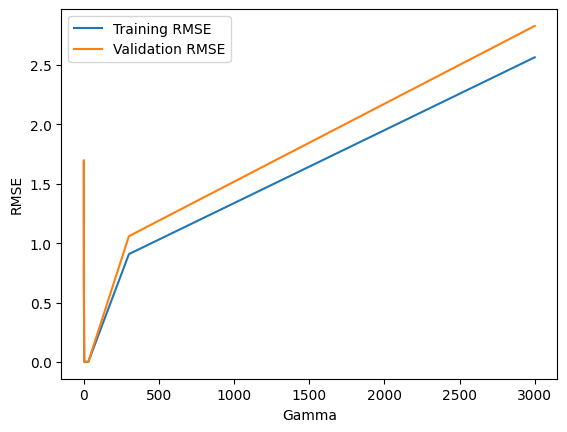

In [ ]:
gamma_d = best_m / 200
gamma = [0.01 * gamma_d, 0.1 * gamma_d, gamma_d, 10 * gamma_d, 100 * gamma_d, 1000 * gamma_d]

plt.plot(gamma, M_train[-1], label = 'Training RMSE')
plt.plot(gamma, M_val[-1], label = 'Validation RMSE')
plt.xlabel('Gamma')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [ ]:
gamma = [0.01, 0.1, 1, 10, 100, 1000]

for i in range(len(M_val)):
    
    for j in range(len(M_val[0])):
        
        if M_val[i][j] <= 0.1 * rmse:
            min_M = M[i]
            min_gamma = gamma[j]*min_M/200
            break

    if M_val[i][j] <= 0.1 * rmse:
        break
            
RCC_model = [min_M, min_gamma]
print(f"RCC parameters: M = {RCC_model[0]} and Gamma = {RCC_model[1]}")

RCC parameters: M = 100 and Gamma = 5.0


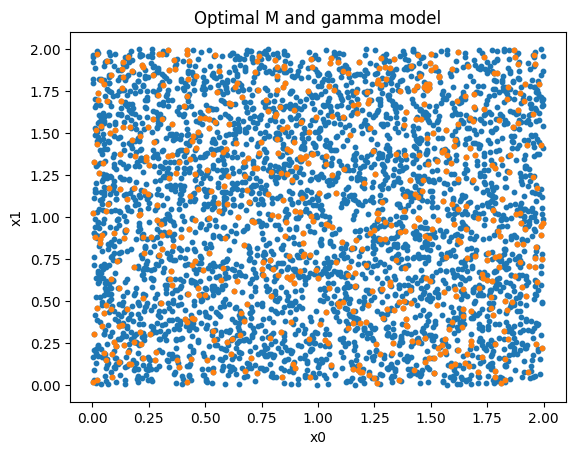

In [ ]:
random_idx = np.random.choice(X_train.shape[0], size = best_m, replace = False)
rand_train_X = X_train[random_idx]
plt.title('Optimal M and gamma model')
plt.xlabel('x0')
plt.ylabel('x1')
plt.scatter(X_train[:, 0], X_train[:, 1], s = 10)
plt.scatter(rand_train_X[:, 0], rand_train_X[:, 1], s = 10)

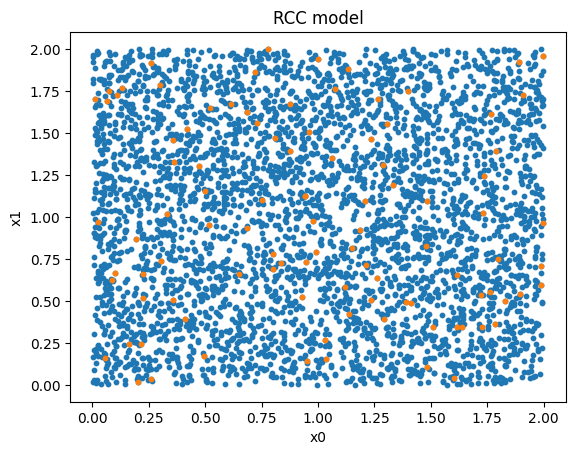

In [ ]:
random_idx = np.random.choice(X_train.shape[0], size=RCC_model[0], replace = False)
rand_train_X = X_train[random_idx]
plt.title('RCC model')
plt.xlabel('x0')
plt.ylabel('x1')
plt.scatter(X_train[:, 0], X_train[:, 1], s = 10)
plt.scatter(rand_train_X[:, 0], rand_train_X[:, 1], s = 10)

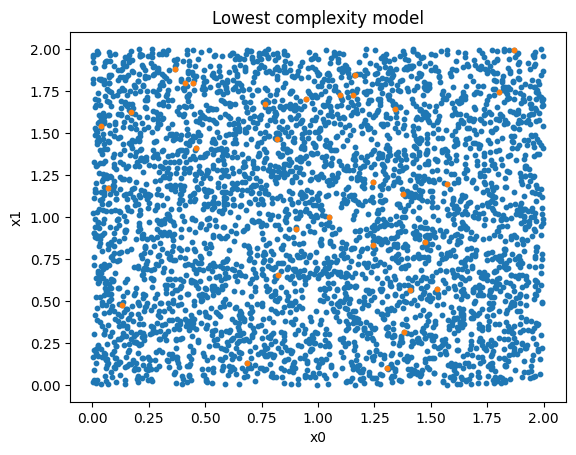

In [ ]:
random_idx = np.random.choice(X_train.shape[0], size = 30, replace = False)
rand_train_X = X_train[random_idx]
plt.title('Lowest complexity model')
plt.xlabel('x0')
plt.ylabel('x1')
plt.scatter(X_train[:, 0], X_train[:, 1], s = 10)
plt.scatter(rand_train_X[:, 0], rand_train_X[:, 1], s = 10)

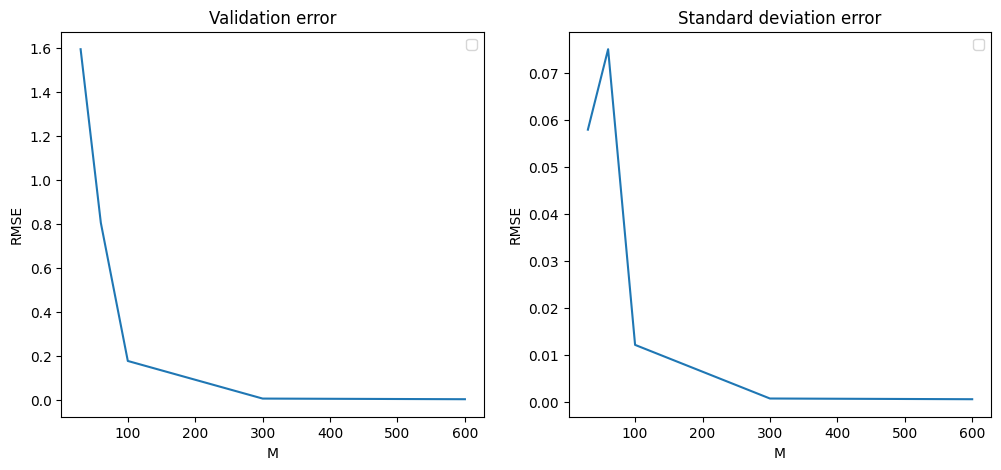

In [ ]:
val_err = [min(i) for i in M_val]
std_err = []
j = 0

for i in M_val:
    index = i.index(min(i))
    std_err.append(M_val_std[j][index])
    j += 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5)) 

ax1.plot(M, val_err)
ax1.set_title('Validation error')
ax1.set_xlabel('M')
ax1.set_ylabel('RMSE')
ax1.legend()

ax2.plot(M, std_err)
ax2.set_title('Standard deviation error')
ax2.set_xlabel('M')
ax2.set_ylabel('RMSE')
ax2.legend()
plt.show()
fig.tight_layout()

(e) Use K-means clustering to choose basis function centers for a given K; vary K using model selection (e.g., use values 30, 60, 100, 300, 600). For each value of K, choose your initial cluster centers randomly (i.e., in sklearn’s K-means). In this part you have 2 hyperparameters to find during model selection (γ and K ).

In [ ]:
warnings.filterwarnings("ignore")

K = [30, 60, 100, 300, 600]
K_train = []
K_val = []
K_train_std = []
K_val_std = []

for m in K:
    gamma_d = m / 200
    gamma = [0.01 * gamma_d, 0.1 * gamma_d, gamma_d, 10 * gamma_d, 100 * gamma_d, 1000 * gamma_d]
    training_meangamma, validation_meangamma = [], []
    training_stdgamma, validation_stdgamma = [], []
    kfold = KFold(n_splits = 4)
    
    for g in gamma:
        curr_mean_train, curr_mean_val = [], []
        
        for i, j in kfold.split(X_train):         
            train_X, val_X = X_train[i], X_train[j]
            train_y, val_y = y_train[i], y_train[j]
            kmeans = KMeans(n_clusters = m, init = 'random').fit(train_X)
            layer1 = rbf_kernel(train_X, Y = kmeans.cluster_centers_, gamma = g)
            layer2 = LinearRegression().fit(layer1, train_y)
            predict_train = layer2.predict(layer1)
            layer1 = rbf_kernel(val_X, Y = kmeans.cluster_centers_, gamma = g)
            predict_val = layer2.predict(layer1)
            rmse_train = mse(train_y, predict_train) ** 0.5
            rmse_val = mse(val_y, predict_val) ** 0.5 
            curr_mean_train.append(rmse_train)
            curr_mean_val.append(rmse_val)

        training_meangamma.append(np.array(curr_mean_train).mean())
        validation_meangamma.append(np.array(curr_mean_val).mean())
        training_stdgamma.append(np.array(curr_mean_train).std())
        validation_stdgamma.append(np.array(curr_mean_val).std())

    K_train.append(training_meangamma)
    K_val.append(validation_meangamma)
    K_train_std.append(training_stdgamma)
    K_val_std.append(validation_stdgamma)
    
row_average = [sum(i) / len(i) for i in K_val]
best_k = K[np.argmin(np.array(row_average))]
gamma = [0.01, 0.1, 1, 10, 100, 1000]
index = K.index(best_k)
best_gamma = gamma[K_val[index].index(min(K_val[index]))] * best_k / 200
print('Best K:', best_k, ',', 'Gamma:', best_gamma)

Best K: 600 , Gamma: 30.0


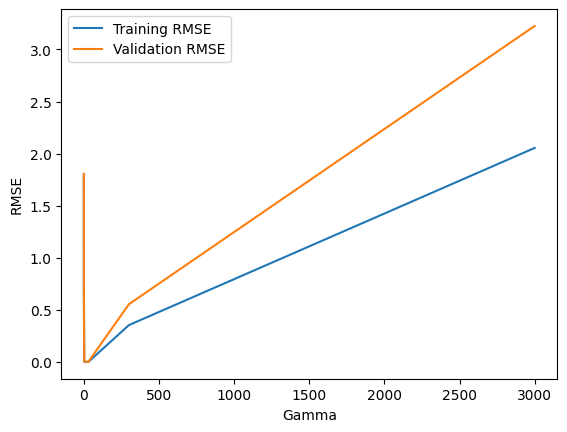

In [ ]:
gamma_d = best_k / 200
gamma = [0.01 * gamma_d, 0.1 * gamma_d, gamma_d, 10 * gamma_d, 100 * gamma_d, 1000 * gamma_d]

plt.plot(gamma, K_train[-1], label = 'Training RMSE')
plt.plot(gamma, K_val[-1], label = 'Validation RMSE')
plt.xlabel('Gamma')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [ ]:
gamma = [0.01, 0.1, 1, 10, 100, 1000]

for i in range(len(K_val)):
    
    for j in range(len(K_val[0])):
        
        if K_val[i][j] <= 0.1 * rmse:
            min_K = K[i]
            min_gamma = gamma[j] * min_K / 200
            break

    if K_val[i][j] <= 0.1 * rmse:
        break
            
RCC_model = [min_K, min_gamma]
print(f"RCC parameters: K = {RCC_model[0]} and Gamma = {RCC_model[1]}")

RCC parameters: K=100 and Gamma=5.0


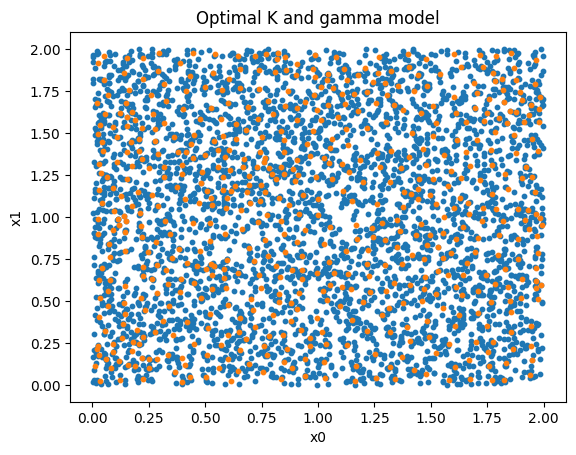

In [ ]:
kmeans = KMeans(n_clusters = best_k, init = 'random').fit(X_train)
rand_train_X = kmeans.cluster_centers_
plt.title('Optimal K and gamma model')
plt.xlabel('x0')
plt.ylabel('x1')
plt.scatter(X_train[:, 0], X_train[:, 1], s = 10)
plt.scatter(rand_train_X[:, 0], rand_train_X[:, 1], s = 10)

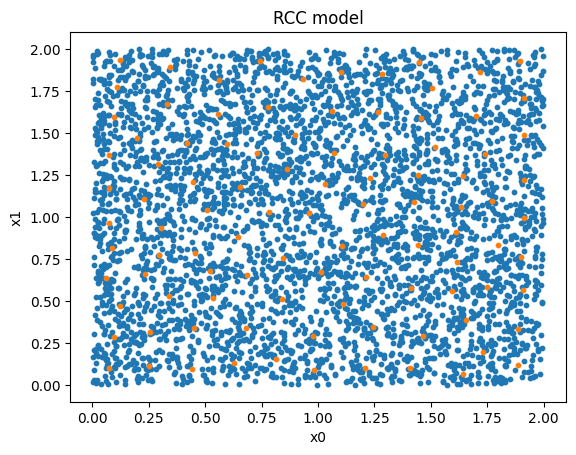

In [ ]:
kmeans = KMeans(n_clusters = RCC_model[0], init = 'random').fit(X_train)
rand_train_X = kmeans.cluster_centers_
plt.title('RCC model')
plt.xlabel('x0')
plt.ylabel('x1')
plt.scatter(X_train[:, 0], X_train[:, 1], s = 10)
plt.scatter(rand_train_X[:, 0], rand_train_X[:, 1], s = 10)

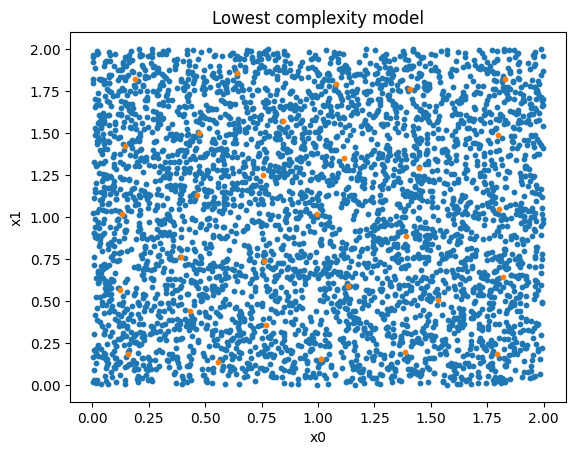

In [ ]:
kmeans = KMeans(n_clusters = 30, init = 'random').fit(X_train)
rand_train_X = kmeans.cluster_centers_
plt.title('Lowest complexity model')
plt.xlabel('x0')
plt.ylabel('x1')
plt.scatter(X_train[:, 0], X_train[:, 1], s = 10)
plt.scatter(rand_train_X[:, 0], rand_train_X[:, 1], s = 10)

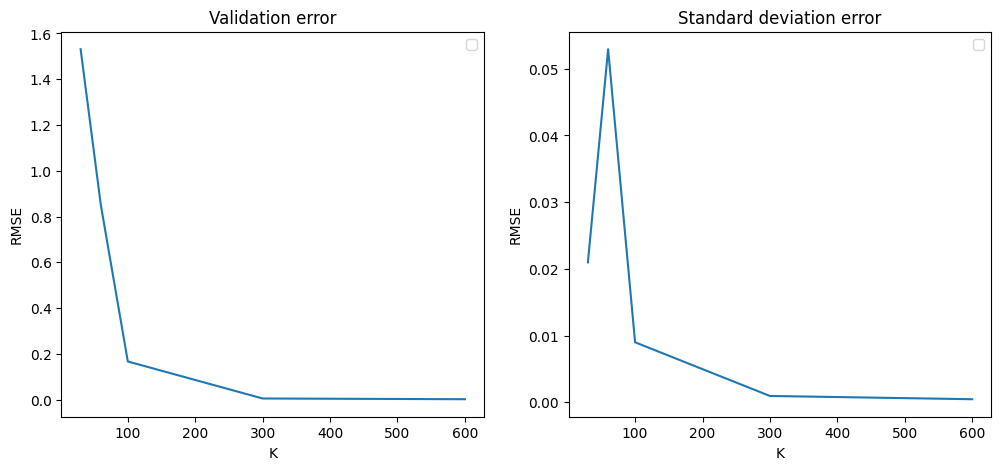

In [ ]:
val_err = [min(i) for i in K_val]
std_err = []
j = 0

for i in K_val:
    index = i.index(min(i))
    std_err.append(K_val_std[j][index])
    j += 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5)) 
ax1.plot(K, val_err)
ax1.set_title('Validation error')
ax1.set_xlabel('K')
ax1.set_ylabel('RMSE')
ax1.legend()

ax2.plot(K, std_err)
ax2.set_title("Standard deviation error")
ax2.set_xlabel('K')
ax2.set_ylabel('RMSE')
ax2.legend()
plt.show()
fig.tight_layout()

(g) Run the best model from each of (c), (d), and (e); and run the RCC model of (d), (e), on your test set. Report the RMSE of each (5 models total).

In [ ]:
layer1 = rbf_kernel(X_train, gamma = 15)
layer2 = LinearRegression().fit(layer1, y_train)
layer1 = rbf_kernel(X_test, Y = X_train, gamma = 15)
predict_test = layer2.predict(layer1)
rmse_test = mse(y_test, predict_test) ** 0.5
print("2c: For best Gamma = 15 | Test RMSE =", rmse_test)

random_idx = np.random.choice(4000, 600, replace = False)
rand_train_X = X_train[random_idx]
layer1 = rbf_kernel(X_train, Y = rand_train_X, gamma = 30)
layer2 = LinearRegression().fit(layer1, y_train)
layer1 = rbf_kernel(X_test, Y = rand_train_X, gamma = 30)
predict_test = layer2.predict(layer1)
rmse_test = mse(y_test, predict_test) ** 0.5
print("2d: For best M = 600, Gamma = 30 | Test RMSE =", rmse_test)

kmeans = KMeans(n_clusters = 600, init = 'random').fit(X_train)
layer1 = rbf_kernel(X_train, Y = kmeans.cluster_centers_, gamma = 30)
layer2 = LinearRegression().fit(layer1, y_train)
layer1 = rbf_kernel(X_test, Y = kmeans.cluster_centers_, gamma = 30)
predict_test = layer2.predict(layer1)
rmse_test = mse(y_test, predict_test) ** 0.5
print("2e: For best K = 600, Gamma = 30 | Test RMSE =", rmse_test)

random_idx = np.random.choice(4000, 100, replace = False)
rand_train_X = X_train[random_idx]
layer1 = rbf_kernel(X_train, Y = rand_train_X, gamma = 5)
layer2 = LinearRegression().fit(layer1, y_train)
layer1 = rbf_kernel(X_test, Y = rand_train_X, gamma = 5)
predict_test = layer2.predict(layer1)
rmse_test = mse(y_test, predict_test) ** 0.5
print("2d: For best RCC model M = 100, Gamma = 5 | Test RMSE =", rmse_test)

kmeans = KMeans(n_clusters = 100, init = 'random').fit(X_train)
layer1 = rbf_kernel(X_train, Y = kmeans.cluster_centers_, gamma = 5)
layer2 = LinearRegression().fit(layer1, y_train)
layer1 = rbf_kernel(X_test, Y = kmeans.cluster_centers_, gamma = 5)
predict_test = layer2.predict(layer1)
rmse_test = mse(y_test, predict_test) ** 0.5
print("2e: For best RCC model K = 100, Gamma = 5 | Test RMSE =", rmse_test)

2c: For best Gamma=15 | Test RMSE = 1.0428537734443512e-07
2d: For best M=600, Gamma=30 | Test RMSE = 0.00228585152517278
2e: For best K=600, Gamma=30 | Test RMSE = 0.0027215505921105642
2d: For best RCC model M=100, Gamma=5 | Test RMSE = 0.17569150440052814
2e: For best RCC model K=100, Gamma=5 | Test RMSE = 0.18007067244886948


(i) The dataset was drawn from the following target function:
y(𝑥) = 10 cos Dπ2x1E sin U5𝜋𝑥#$ + 1X sin(𝜋𝑥$)
To visuialize the target function, plot 𝑦(𝑥#, 𝑥$) vs. 𝑥# for 𝑥$ = 0.5 and for 𝑥$ = 1.5. Also plot 𝑦(𝑥#, 𝑥$) vs. 𝑥$ for 𝑥# = 0.3. (3 plots total)
To compare the prediction with the target, plot 𝑓[(𝑥#, 𝑥$) and 𝑦(𝑥#, 𝑥$) vs. 𝑥# for 𝑥$ = 0.5, for the following cases: your best result from each of (c), (d), (e); and also your RCC model from each of (d), (e). (5 plots total for comparing prediction with target)

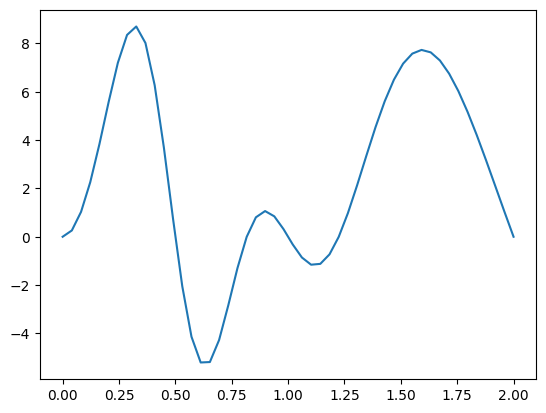

In [ ]:
x1 = np.linspace(0, 2)
y_test = 10 * np.cos((np.pi / 2) * x1) * np.sin((5 * np.pi) / ((x1 ** 2) + 1)) * np.sin(0.5 * np.pi)
plt.plot(x1, y_test)

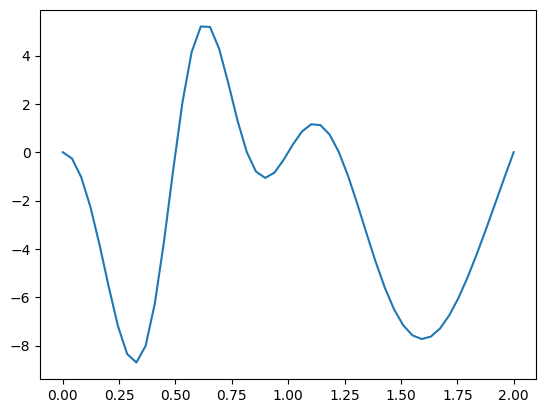

In [ ]:
y = 10 * np.cos((np.pi / 2) * x1) * np.sin((5 * np.pi) / ((x1 ** 2) + 1)) * np.sin(1.5 * np.pi)
plt.plot(x1, y)

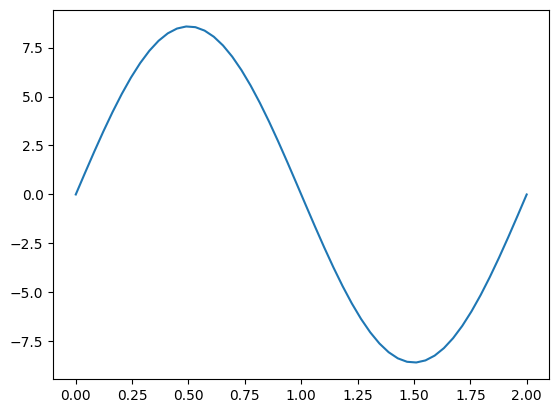

In [ ]:
y = 10 * np.cos((np.pi / 2) * 0.3) * np.sin((5 * np.pi) / ((0.3 ** 2) + 1)) * np.sin(x1 * np.pi)
plt.plot(x1, y)

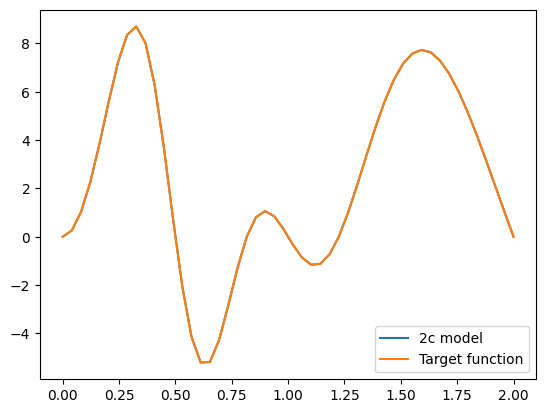

In [ ]:
x2 = np.array([0.5] * 50)
data = np.hstack((x1.reshape(50, 1), x2.reshape(50, 1)))

layer1 = rbf_kernel(X_train, gamma = 15)
layer2 = LinearRegression().fit(layer1, y_train)
layer1 = rbf_kernel(data, Y = X_train, gamma = 15)
predict_test = layer2.predict(layer1)

plt.plot(x1, predict_test, label = '2c model')
plt.plot(x1, y_test, label = 'Target function')
plt.legend()
plt.show()

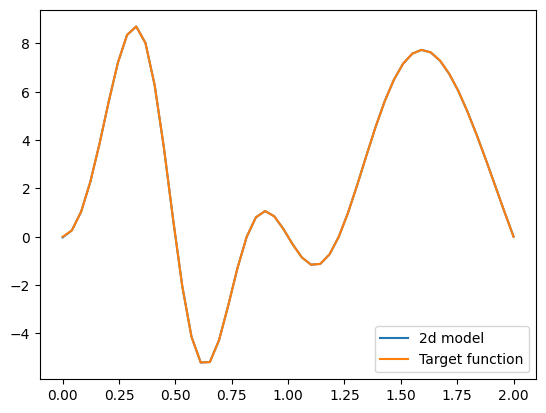

In [ ]:
random_idx = np.random.choice(4000, 600, replace = False)
rand_train_X = X_train[random_idx]
layer1 = rbf_kernel(X_train, Y = rand_train_X, gamma = 30)
layer2 = LinearRegression().fit(layer1, y_train)
layer1 = rbf_kernel(data, Y = rand_train_X, gamma = 30)
predict_test = layer2.predict(layer1)

plt.plot(x1, predict_test, label = '2d model')
plt.plot(x1, y_test, label = 'Target function')
plt.legend()
plt.show()

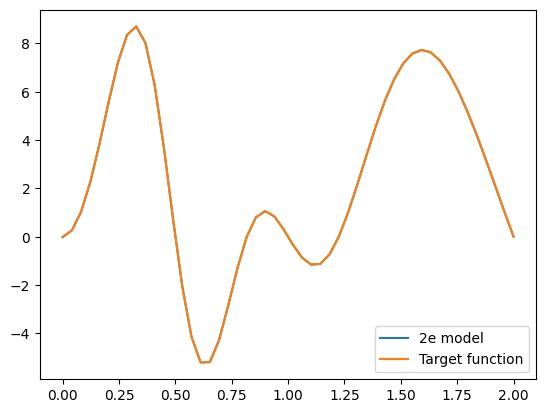

In [ ]:
kmeans = KMeans(n_clusters = 600, init = 'random').fit(X_train)
layer1 = rbf_kernel(X_train, Y = kmeans.cluster_centers_, gamma = 30)
layer2 = LinearRegression().fit(layer1, y_train)
layer1 = rbf_kernel(data, Y = kmeans.cluster_centers_, gamma = 30)
predict_test = layer2.predict(layer1)
rmse_test = mse(y_test, predict_test) ** 0.5

plt.plot(x1, predict_test, label = '2e model')
plt.plot(x1, y_test, label = 'Target function')
plt.legend()
plt.show()

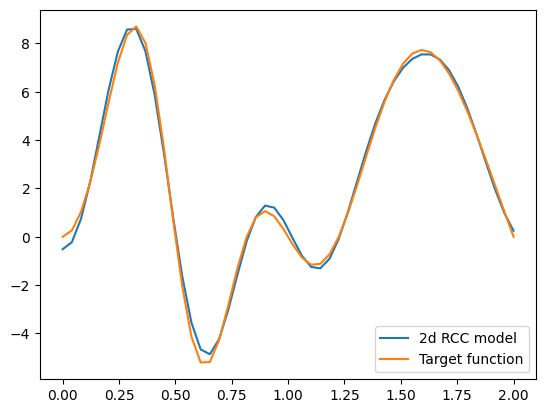

In [ ]:
random_idx = np.random.choice(4000, 100, replace = False)
rand_train_X = X_train[random_idx]
layer1 = rbf_kernel(X_train, Y = rand_train_X, gamma = 5)
layer2 = LinearRegression().fit(layer1, y_train)
layer1 = rbf_kernel(data, Y = rand_train_X, gamma = 5)
predict_test = layer2.predict(layer1)

plt.plot(x1, predict_test, label = '2d RCC model')
plt.plot(x1, y_test, label = 'Target function')
plt.legend()
plt.show()

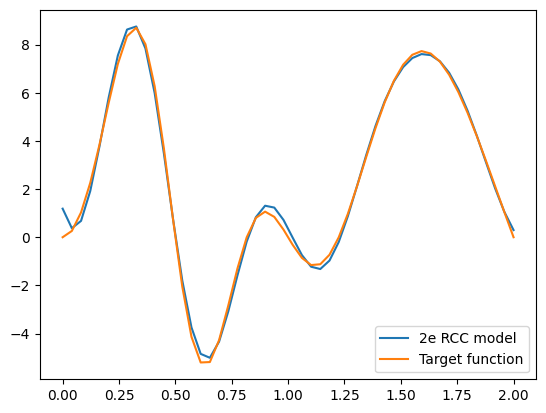

In [ ]:
kmeans = KMeans(n_clusters = 100, init = 'random').fit(X_train)
layer1 = rbf_kernel(X_train, Y = kmeans.cluster_centers_, gamma = 5)
layer2 = LinearRegression().fit(layer1, y_train)
layer1 = rbf_kernel(data, Y = kmeans.cluster_centers_, gamma = 5)
predict_test = layer2.predict(layer1)
rmse_test = mse(y_test, predict_test) ** 0.5

plt.plot(x1, predict_test, label = '2e RCC model')
plt.plot(x1, y_test, label = 'Target function')
plt.legend()
plt.show()

In [ ]:
pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tabulate import tabulate

headers = ["Gamma", "Mean RMSE", "Standard deviation RMSE"]
table = []
j = 0

for i in validation_meangamma:
    row = [gamma[j], i, validation_stdgamma[j]]
    table.append(row)
    j += 1

print(tabulate(table, headers = headers, floatfmt = ".9f"))

         Gamma    Mean RMSE    Standard deviation RMSE
--------------  -----------  -------------------------
   0.010000000  1.806044746                0.161837122
   0.100000000  0.712340825                0.012482051
   1.000000000  0.003262091                0.000473591
  10.000000000  0.002128203                0.000451725
 100.000000000  0.555071288                0.047672191
1000.000000000  3.225763296                0.465147989
